<a href="https://colab.research.google.com/github/matfriedmann/airbnb_data_analysis_mexico_city/blob/main/Analyzing_Airbnb_Data_Mexico_City.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

 **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Airbnb Data Analysis - *Mexico City*

<center><img alt="Analisando Airbnb" width="40%" src="https://images.unsplash.com/photo-1585464231875-d9ef1f5ad396?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80"></center>




> Taking advantage of the Soccer World Cup atmosphere, we will analyze data from one of the cities that will host the competition in 2026, Mexico City.


Mexico City, besides being the capital of Mexico, is one of the world's great tourist centers, registering 31.9 million international tourists in 2021.

When it comes to tourism, it is essential to mention [Airbnb](https://www.airbnb.com.br/), one of the largest lodging rental platforms today.

The startup, founded in 2008, is present in more than 220 countries and has more than 4 million registered hosts, offering alternatives to traditional lodging by connecting owners willing to rent their homes and tenants looking for a place to stay.  

With a mission to demonstrate the company's impact on the residential community, Airbnb makes data from major cities around the globe available through the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) portal, which we will use to extract and analyze the data from *Mexico City*.
<center><img alt="Analyzing Airbnb" width="20%" src="https://static.poder360.com.br/2022/03/Logomarca-Airbnb-848x477.jpg"></center>

**In this *notebook*, we will look at data pertaining to Mexico City, and see what insights can be extracted from the raw data.**

## Data Collection


In [14]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline

In [15]:
# importing the listings.csv file into a DataFrame
df = pd.read_csv('http://data.insideairbnb.com/mexico/df/mexico-city/2022-09-22/visualisations/listings.csv')

## Data Analysis


**Dictionary of variables**

* `id` - Identification number of the property
* `name` - Name of the advertised property
* `host_id` - Identification number of the owner (host) of the property
* `host_name` - Host name
* `neighbourhood_group` - Neighbourhood group - No valid data is found for this column
* `neighbourhood` - Neighbourhood name
* `latitude` - Latitude coordinate of the property
* `longitude` - Longitude coordinate of property
* `room_type` - Tells you what type of room is offered
* `price` - Rental price of the property
* `minimum_nights` - Minimum number of nights for a reservation
* `number_of_reviews` - Number of reviews the property has
* `last_review` - Date of last review
* `reviews_per_month` - Amount of reviews per month
* `calculated_host_listings_count` - Amount of properties from the same host
* `availability_365` - Number of days of availability within 365 days

Before starting any analysis, let's check a sample *Data Frame*, where we can check how the data came in by default and analyze its contents.

In [16]:
# show the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4001,1,0,NaN,NaN,1,363,0,NaN
1,783480,"Area Sta.Fe,IberoABC Hospital Rooms",4129056,Janet,NaN,Cuajimalpa de Morelos,19.35379,-99.28459,Private room,500,2,27,2019-11-30,0.26,2,363,0,NaN
2,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,18000,1,58,2022-08-29,0.44,12,331,8,NaN
3,796477,Classic but Modern Apartment in Condesa,4195771,Jair,NaN,Cuauhtémoc,19.41824,-99.17560,Private room,599,3,144,2022-05-18,1.52,1,323,3,NaN
4,56074,Great space in historical San Rafael,265650,Maris,NaN,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,650,2,76,2022-09-08,0.54,2,354,15,NaN


Here we can already notice some details about the data being analyzed, such as the `id` and `host_id` fields being good candidates to be used as an index if we need to locate specific entries, because of their unique identifier characteristic of the entries.

Also notable is the majority absence of values in the `neighbourhood_group` and `license` fields, where we will have to check their percentage of missing values and treat them accordingly to ensure accuracy and the best visualization of the data.

### **Checking the type of attributes (variables) and set entries**

In [17]:
# identify the volume of data in the DataFrame
print('Number of entries: ',df.shape[0])
print('Number of columns: ',df.shape[1])
print('\n')
# displaying the columns and their types
display(df.dtypes)

Number of entries:  22948
Number of columns:  18




id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Percentage of missing values in the Data set**

Variables 	 Percent missing values(%)


license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  17.722677
last_review                        17.722677
name                                0.013073
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

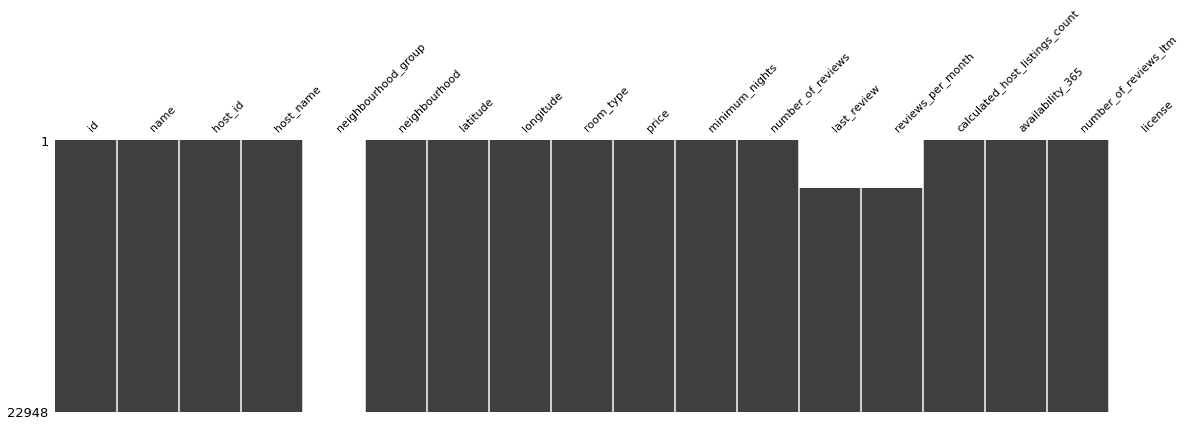

In [18]:
# sort in descending order the variables by their missing values
print("Variables \t Percent missing values(%)")
display((df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False))

# graphical display of missing data separated by fields
msno.matrix(df, figsize=(20,5),fontsize=11, sort="ascending",sparkline=False);

As assumed in the first data display, here we confirm the complete absence of data in the `license` and `neighbourhood_group` fields. Because there is no valid data, we can delete this column from our *data set*, since it becomes irrelevant to our analysis.

In [19]:
# Remove columns with missing data
df.drop(['license', 'neighbourhood_group'], axis=1, inplace=True)

### **Droping irrelevant fields** 

In this analysis, I do not think it is necessary to have the `host_id` and `id` fields, since the entries will not be queried individually for their identification numbers.

In [20]:
# Remove id and host_id columns
df.drop(['host_id', 'id'], axis=1, inplace=True)

# Viewing the data set after removal
df.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Villa Dante,Dici,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,4001,1,0,NaN,NaN,1,363,0
1,"Area Sta.Fe,IberoABC Hospital Rooms",Janet,Cuajimalpa de Morelos,19.35379,-99.28459,Private room,500,2,27,2019-11-30,0.26,2,363,0
2,CONDESA HAUS B&B,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,18000,1,58,2022-08-29,0.44,12,331,8
3,Classic but Modern Apartment in Condesa,Jair,Cuauhtémoc,19.41824,-99.17560,Private room,599,3,144,2022-05-18,1.52,1,323,3
4,Great space in historical San Rafael,Maris,Cuauhtémoc,19.43977,-99.15605,Entire home/apt,650,2,76,2022-09-08,0.54,2,354,15


### **Distribution of variables** 

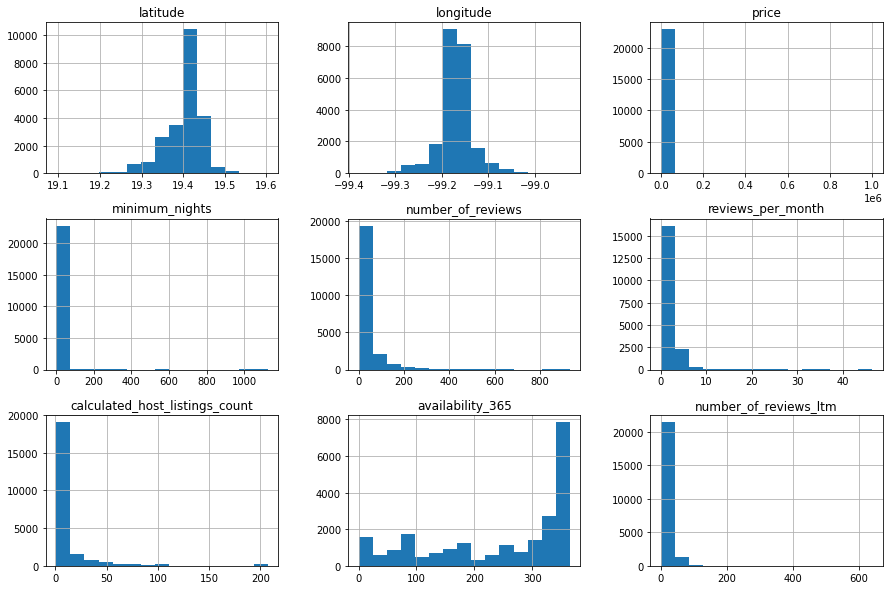

In [21]:
# ploting the histogram of the numerical variables
df.hist(bins=15, figsize=(15,10));

In the histograms above, it is possible to notice some inconsistencies in some of the graphs, such as price (`price`) and minimum nights (`minimum_nights`), which show a high concentration in only one region of the graph, not allowing an optimal visualization of the data.

To solve this problem, we have to investigate further how the data are distributed, identify the presence of outliers (atypical values) and treat them so that the data visualization is not biased.

###**Identifying and Handling Outliers**

In [23]:
# Displaying statistical data about numeric fields
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22948.000000,22948.000000,22948.000000,18881.000000,22948.000000,22948.000000
mean,1536.946270,4.714485,32.446706,1.597002,10.950061,243.796714
std,11758.611104,26.598558,57.862531,1.959936,25.254145,123.178864
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,500.000000,1.000000,1.000000,0.370000,1.000000,140.000000
50%,899.000000,2.000000,10.000000,1.000000,3.000000,300.000000
75%,1490.000000,2.000000,37.000000,2.230000,8.000000,353.000000
max,999998.000000,1125.000000,932.000000,46.450000,207.000000,365.000000


Looking at the displayed data, we can confirm some hypotheses:

* The `price` variable has 75% of the value below 1490, while the maximum value is 999998, consisting of a discrepant value.

* The maximum value of the minimum number of nights (`minimum_nights`) is above 365 days in the year.

###Cleaning Outliers

To define the cutoff limit of the variable `price`, the method of detection and removal of outliers *IQR* (Interquartile Range) will be used, which consists in calculating the IQR and using it as a reference value to define as atypical value the entries where this limit is exceeded.

The IQR is calculated by subtracting the 75% percentile from the 25% percentile (IQR = Q3-Q1).

The upper distribution band cutoff value will be 1.5 times the IQR, added to the 75% percentile (Q3 + 1.5*IQR). Everything above this value will be removed.

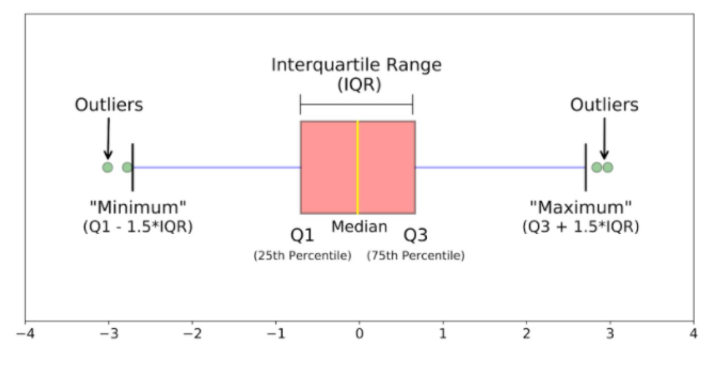

For the variable `minimum_nights`, I will use the reference that can be found in the portal [Inside Airbnb: Mexico City](http://insideairbnb.com/mexico-city/), where the entries where `minimum_nights` is less than 30 are considered "Short-Term Rentals", thus defining the cutoff line for outliers.

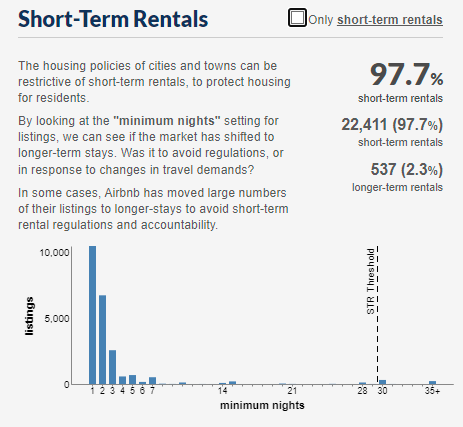

####price

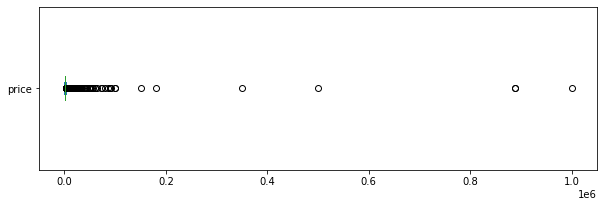


IQR:  990.0
cut line:  2975.0

Values above the cut line:
1585 entries
6.9069%


In [24]:
#Displaying the distribution of the variable price via a boxplot
df.price.plot(kind='box', vert=False, figsize=(10, 3))
plt.show()

#Setting the IQR cut-off line
q1,q3 = np.percentile(df.price,[25,75])
iqr = q3 - q1
outlier_cut = q3 + (1.5*iqr)
print("\nIQR: ",iqr)
print("cut line: ",outlier_cut)

print("\nValues above the cut line:")


print("{} entries".format(len(df[df.price > outlier_cut])))
print("{:.4f}%".format((len(df[df.price > outlier_cut]) / df.shape[0])*100))

In [25]:
#Removing the unwanted data from the Data Set
df_clean = df.copy();
df_clean.drop(df_clean[df_clean.price > outlier_cut].index, axis=0, inplace=True)

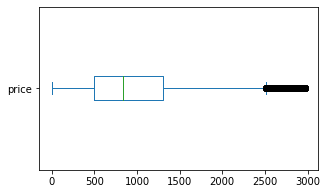

In [26]:
#Distribution after removal
df_clean.price.plot(kind='box', vert=False, figsize=(5, 3))
plt.show()

####minimum_nights


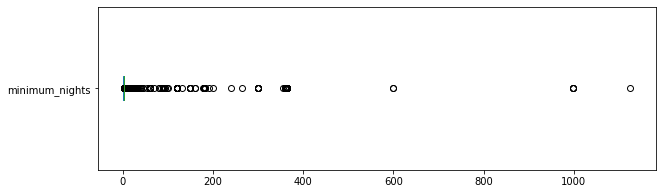

Cutoff line = 30


Values over 30 days:
229 entries
0.9979%


In [31]:
#Displaying the distribution of the variable minimum_nights via a boxplot
df.minimum_nights.plot(kind='box', vert=False, figsize=(10, 3))
plt.show()

# see the number of values above 30 days for minimum_nights
print("Cutoff line = 30")
print("\n\nValues over 30 days:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

In [32]:
#Removing the unwanted data from the Data Set
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

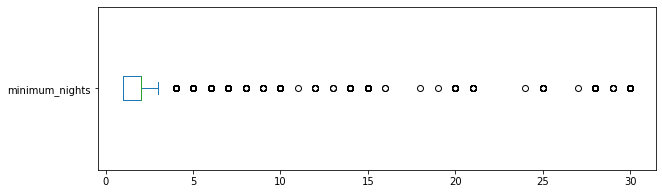

In [33]:
#Distribution after removal
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(10, 3))
plt.show()

### **Distribution of variables without outlier values** 

After detecting and removing the outliers present in the `price` and `minimum_nights` fields, we can again display the data for a more accurate analysis.

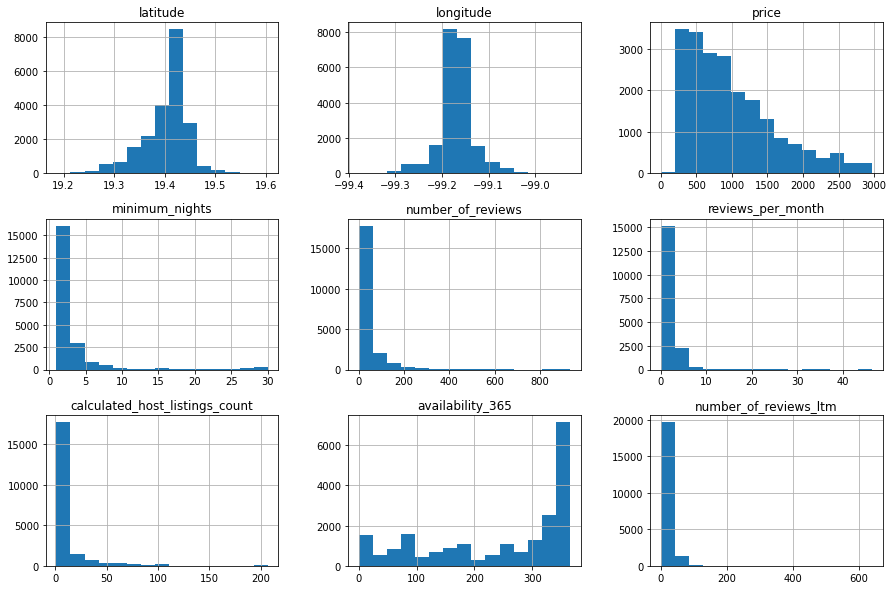

In [34]:
df_clean.hist(bins=15, figsize=(15,10));

And now that we have a better visualization of the distribution of the data, we can make some hypotheses and further analyze the data contained in the *data set*.

### **Q1. What is the average rental price?**

In [35]:
# see the average of the `price` column
print('Average rent prices:')
print("\nMex${:.2f}".format(df_clean.price.mean()))

Average rent prices:

Mex$978.65


### **Q2. What is the correlation between the variables?**

Correlation allows you to measure the relationship between variables and what they represent, by means of correlation coefficients. For example, it is possible to measure the correlation between Air Pollution Increase x Respiratory Illnesses, or Unemployment Rate x Crime Index.

The intensity of the correlation between variables is represented between the interval -1 and 1, with values near the extremities of the interval correlations being stronger, and values near 0 being weaker.

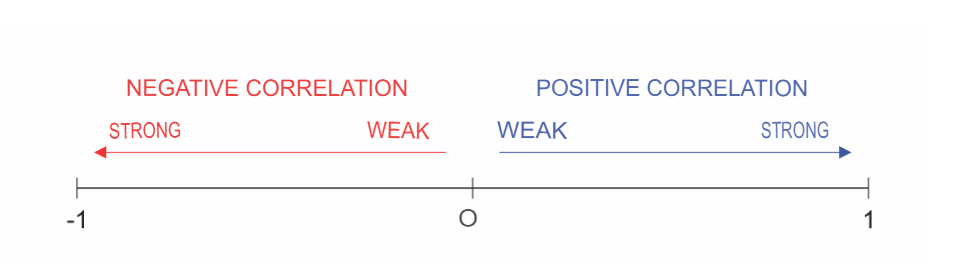

Bringing it to our analysis, to identify the presence of correlated variables, we will:


* Generate a correlation matrix
* Display the data in this matrix with a *heatmap*, using the imported `seaborn` library

In [36]:
# Creating the correlation matrix of the numerical variables
correlation = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr();

# Displaying the correlation matrix
display(correlation)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.080723,0.045456,0.081579,0.230493,0.025551
minimum_nights,-0.080723,1.000000,-0.099450,-0.162912,-0.051025,-0.046132
number_of_reviews,0.045456,-0.099450,1.000000,0.597283,0.013389,-0.043787
reviews_per_month,0.081579,-0.162912,0.597283,1.000000,0.109138,0.072608
calculated_host_listings_count,0.230493,-0.051025,0.013389,0.109138,1.000000,0.137523
availability_365,0.025551,-0.046132,-0.043787,0.072608,0.137523,1.000000


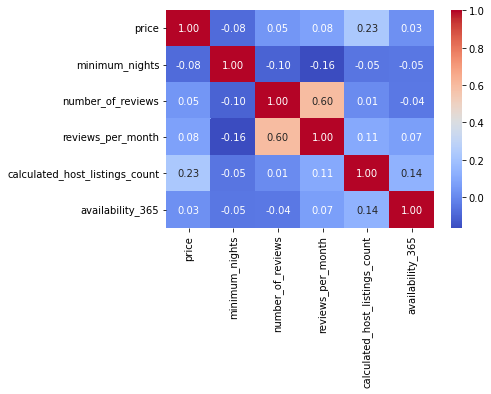

In [37]:
# Building a heatmap from correlations
sns.heatmap(correlation, cmap='coolwarm', fmt='.2f', square=False, linecolor='white', annot=True);

Looking at the heatmap above, it can be seen that there is not much correlation between the variables, the strongest being between `number_of_reviews` (Number of Reviews) and `reviews_per_month` (Reviews per Month), showing a positive correlation of 0.60.

We can better visualize the relationship of the variables by comparing them in a *scatter* graph:

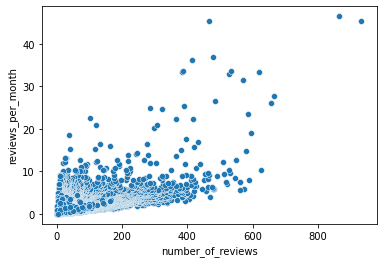

In [38]:
# Showing relationship of reviews_per_month and number_of_reviews variables
sns.scatterplot(x="number_of_reviews", y="reviews_per_month", data=df_clean);

The demonstrated correlation makes sense, considering that the amount of monthly reviews of a property is directly related to the total amount of reviews. A valid hypothesis is that the weakening of the correlation is due to the non-linearity that properties can be evaluated, considering that the amount of monthly reviews of a property varies throughout the months.

### **Q3. What is the most popular type of property on Airbnb?**

Property Types - Percentage(%)



Entire home/apt    60.196514
Private room       37.554915
Shared room         1.521092
Hotel room          0.727479
Name: room_type, dtype: float64

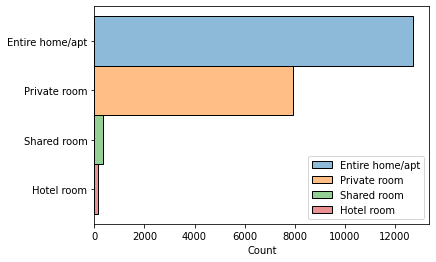

In [41]:
# show the percentage of each available property type
print("Property Types - Percentage(%)\n")
display((df_clean.room_type.value_counts() / df_clean.shape[0]) *100)

# Distribution of room types
sorted_roomtype = pd.Categorical(df_clean.room_type, ['Entire home/apt','Private room','Shared room','Hotel room'])
sns.histplot(data=sorted_roomtype, y=sorted_roomtype, hue=sorted_roomtype);

In [42]:
# show the quantity of each type of property available
print("Property types - Quantity")
df_clean.room_type.value_counts()

Property types - Quantity


Entire home/apt    12743
Private room        7950
Shared room          322
Hotel room           154
Name: room_type, dtype: int64

It can be seen in the data above that:

* *Shared rooms* and *hotel rooms* are not common rental types within the platform, representing 1.5% and 0.7% of listings.

* *Entire home/apt* properties represent 60.1% of available properties, while *Private room* properties represent 37.5%. Meaning that hosts often prefer to rent out their entire properties rather than separate them into room-by-room rentals.

### **Q4. What is the most expensive location in the dataset?**

In [46]:
# see prices by neighbourhoods, on average
print("Neighbourhoods \t\t Average price (Mex$)\n")
display(df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending=False));

Neighbourhoods 		 Average price (Mex$)



neighbourhood
Miguel Hidalgo            1217.880768
Cuauhtémoc                1108.158378
Cuajimalpa de Morelos     1073.934783
Álvaro Obregón             836.297530
Benito Juárez              808.757766
La Magdalena Contreras     779.727273
Coyoacán                   766.093403
Xochimilco                 666.266129
Iztacalco                  652.012146
Tlalpan                    634.757493
Venustiano Carranza        617.042048
Gustavo A. Madero          596.534722
Azcapotzalco               590.464789
Iztapalapa                 545.772727
Milpa Alta                 474.133333
Tláhuac                    399.513514
Name: price, dtype: float64


To avoid wrong conclusions, we also have to check the number of entries for each neighbourhood and check if there are any with few entries, which may distort the averages and not represent reality.

In [48]:
print("Neighbourhoods \t\t Amount of entries\n")
df_clean.neighbourhood.value_counts()

Neighbourhoods 		 Amount of entries



Cuauhtémoc                8707
Miguel Hidalgo            3489
Benito Juárez             3026
Coyoacán                  1531
Álvaro Obregón             931
Tlalpan                    734
Cuajimalpa de Morelos      598
Venustiano Carranza        547
Gustavo A. Madero          432
Azcapotzalco               355
Iztapalapa                 286
Iztacalco                  247
Xochimilco                 124
La Magdalena Contreras     110
Tláhuac                     37
Milpa Alta                  15
Name: neighbourhood, dtype: int64

Checking the list of entries per neighbourhood above and comparing it with the average price, no inconsistent values were identified.

Using the data from the `latitude` and `longitude` variables, we can visually display the properties sorted by price:

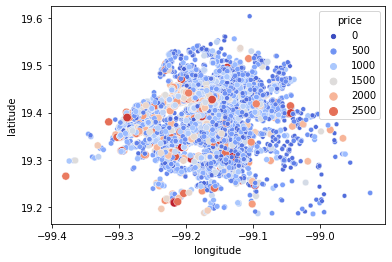

In [49]:
# plot the properties by latitude-longitude
sns.scatterplot(data=df_clean, x =df_clean.longitude, y = df_clean.latitude, hue=df_clean.price, palette="coolwarm", size=df_clean.price);

### **Q5. What is the average minimum nights for rent (minimum_nights)?**

In [50]:
# see the average of the `minimum_nights` column
print('Average of Minimum nights for rent:')
print("\n{:.2f}".format(df_clean.minimum_nights.mean()))

Average of Minimum nights for rent:

2.73


Since the minimum amount of nights cannot be divided into decimal numbers, we can assume that the average minimum amount is between 2 and 3 days.

## Conclusion

This analysis, although superficial, aims to show that even in a limited data set it is possible to apply good data cleaning and treatment practices, and to extract insights through statistical analysis and data visualization, which can help in decision making.

Even in a limited data set, we found outliers and missing data, which we had to clean in order to ensure greater data accuracy and better visualization.

Thus, it is important to note that the sample used for the project is a summarized version of the data, ideal in only an initial approach, for extracting more basic data. In a deeper analysis, a larger data set with complete data and a greater variety of columns is recommended.

## References

https://www.bol.uol.com.br/noticias/2022/08/10/turismo-internacional-no-mexico-cresce-78-interanual-em-junho.htm - Accessed on 11/30/2022

https://news.airbnb.com/br/about-us/ - Accessed on 12/01/2022

https://www.rankingthebrands.com/The-Brand-Rankings.aspx?rankingID=429&year=1396 - Accessed 12/01/2022

https://www.kaggle.com/code/giminosk/titanic-eda - Accessed on 12/02/2022

https://python.plainenglish.io/use-python-to-find-the-interquartile-range-of-a-dataset-cbbb8542db9d - Accessed on 06/12/2022

http://insideairbnb.com/mexico-city/ - Accessed on 12/07/2022

https://statplace.com.br/blog/coeficientes-de-correlacao/ - Accessed on 08/12/2022